# Part I. Root-finding. Newton's iteration.

Write a function which performs Newton's iteration for a given function $f(x)$ with known derivative $f'(x)$. Your function should find the root of $f(x)$ with a predefined absolute accuracy $\epsilon$. 

In [2]:
def newton_iteration(f, fder, x0, eps=1e-5, maxiter=1000):
    """Find a root of $f(x) = 0$ via Newton's iteration starting from x0.
    
    Parameters
    ----------
    f : callable
        The function to find a root of.
    fder : callable
        The derivative of `f`.
    x0 : float
        Initial value for the Newton's iteration.
    eps : float
        The target accuracy. 
        The iteration stops when the distance between successive iterates is below `eps`.
        Default is 1e-5.
    maxiter : int
        The maximum number of iterations (default is 1000.)
        Iterations terminate if the number of iterations exceeds `maxiter`.
        This parameter is only needed to avoid infinite loops if iterations wander off.
        
    Returns
    -------
    x : float
        The estimate for the root.
    niter : int
        The number of iterations.
    """
    
    counter = 0
    x = x0
    while 0 == 0:
        
        if abs(f(x)/fder(x)) < eps:
            break
        elif counter >= maxiter:
            break
        else:
            x = x - f(x)/fder(x)
            counter += 1
    return x, counter

### Test I.1 

Test your implementation on a simple example, $f(x) = x^2 - 1$ or similar. (20% of the total grade)

In [154]:
def u(x):
    return x**2
def der_u(x):
    return 2*x

newton_iteration(u, der_u, 10, eps=1e-5, maxiter=1000)

(1.9073486328125e-05, 19)

Что ж...Это похоже на правду, даже при ужасном начальном приближении.

### Test I.2

Now consider a function which has a multiple root. Take $f(x) = (x^2 - 1)^2$ as an example. Implement a modified Newton's iteraion,

$$
x_{n+1} = x_{n} - m \frac{f(x_n)}{f'(x_n)}
$$

and vary $m= 1, 2, 3, 4, 5$. Check the number of iterations required for convergence within a fixed $\epsilon$. Are your observations consistent with the expectation that the convergence is quadratic is $m$ equals the multiplicity of the root, and is linear otherwise? (40% of the total grade)

In [163]:
def new_newton_iteration(f, fder, x0, eps=1e-5, maxiter=1000, m = 1):
    """Find a root of $f(x) = 0$ via Newton's iteration starting from x0.
    
    Parameters
    ----------
    f : callable
        The function to find a root of.
    fder : callable
        The derivative of `f`.
    x0 : float
        Initial value for the Newton's iteration.
    eps : float
        The target accuracy. 
        The iteration stops when the distance between successive iterates is below `eps`.
        Default is 1e-5.
    maxiter : int
        The maximum number of iterations (default is 1000.)
        Iterations terminate if the number of iterations exceeds `maxiter`.
        This parameter is only needed to avoid infinite loops if iterations wander off.
    m : integer
        The factor before the quotient.
    Returns
    -------
    x : float
        The estimate for the root.
    niter : int
        The number of iterations.
    """
    
    counter = 0
    x = x0
    
    while 0 == 0:
        x_old = x # Запоминаем приближение с прошлого шага. Оно потребуется для оценки скорости сходимости.
        
        x = x_old - m*f(x_old)/fder(x_old) # Считаем приближение на следующем шаге.
        counter += 1
        
        if abs(m*f(x)/fder(x)) < eps: # Проверка условия 
            break
        elif counter >= maxiter:
            break

    return x, counter


In [165]:
def new_newton_iteration_shod(f, fder, x0, eps=1e-5, maxiter=1000, m = 1):
    """Find a root of $f(x) = 0$ via Newton's iteration starting from x0.
    
    Parameters
    ----------
    f : callable
        The function to find a root of.
    fder : callable
        The derivative of `f`.
    x0 : float
        Initial value for the Newton's iteration.
    eps : float
        The target accuracy. 
        The iteration stops when the distance between successive iterates is below `eps`.
        Default is 1e-5.
    maxiter : int
        The maximum number of iterations (default is 1000.)
        Iterations terminate if the number of iterations exceeds `maxiter`.
        This parameter is only needed to avoid infinite loops if iterations wander off.
    m : integer
        The factor before the quotient.
    Returns
    -------
    x : float
        The estimate for the root.
    niter : int
        The number of iterations.
    """
    
    counter = 0
    x = x0
    a = []  # Для проверки линейной сходимости
    b = []  # Для проверки квадратичной сходимости
    #z = [] 
    
    while 0 == 0:
        x_old = x # Запоминаем приближение с прошлого шага. Оно потребуется для оценки скорости сходимости.
        
        x = x_old - m*f(x_old)/fder(x_old) # Считаем приближение на следующем шаге.
        #z.append(abs(x-1))
        counter += 1
        
        # Так как заранее известена кратность корня, можем проверить утверждение на примере конкретной функции.(Работаем с корнем x=1)
        if abs(x - 1) >= abs(x_old-1): # Если требование для линейной сходимости не выполняется на текущем шаге
            a.append(1)
        if abs(x - 1) >= abs(x_old-1)**2: # Если требование для Квадратичной сходимости не выполняется на текущем шаге
            b.append(1)
        
        if abs(m*f(x)/fder(x)) < eps:
            break
        elif counter >= maxiter:
            break
            
    if len(b) == 0: # Если это верно, значит в список ничего не добавлялось, то есть условие квадратичной сходимости выполнялось на каждом шаге.
        shodimost = "Квадратичная сходимость"
    elif len(a) == 0: # Аналогично.
        shodimost = "Линейная сходимость"
    else:
        shodimost = "Сходимость хуже линейной"

    return x, counter, shodimost

In [166]:
def v(x):
    return (x**2-1)**2
def der_v(x):
    return 4*x*(x**2-1)
new_newton_iteration(v, der_v, 10, eps=1e-5, maxiter=1000, m = 1)

(1.0000157327144432, 23)

In [168]:
for i in range(1, 6):
    print('m =', i, "Количество итераций =", new_newton_iteration_shod(v, der_v, 10, eps=1e-5, maxiter=1000, m = i)[1], new_newton_iteration_shod(v, der_v, 10, eps=1e-5, maxiter=1000, m = i)[2])




m = 1 Количество итераций = 23 Линейная сходимость
m = 2 Количество итераций = 6 Квадратичная сходимость
m = 3 Количество итераций = 16 Линейная сходимость
m = 4 Количество итераций = 1000 Сходимость хуже линейной
m = 5 Количество итераций = 1000 Сходимость хуже линейной


Ожидается, что при квадратичной сходимости потребуется меньше итераций, чем при линейной сходимости.Таким образом, мы показали двумя способами (непосредственным сравнением числа итераций и соответствию происходящего определению квадратичной сходимости), что при m =2 (то есть кратности корня) имеет место квадратичная сходимость.

# Part II. Fixed-point iteration

Consider the following equation:

$$
\sqrt{x} = \cos{x}
$$

Plot the left-hand side and right-hand side of this equation, and localize the root graphically. Estimate the location of the root by visual inspection of the plot.

Write a function which finds the solution using fixed-point iteration up to a predefined accuracy $\epsilon$. Compare the result to an estimate from a visual inspection.

Next, rewrite the fixed-point problem in the form

$$
x = x - \alpha f(x)
$$

where $\alpha$ is the free parameter. Check the dependence of the number of iterations required for a given $\epsilon$ on $\alpha$. Compare your results to an expectation that the optimal value of $\alpha$ is given by 

$$
\alpha = \frac{2}{m + M}
$$

where $0 < m < |f'(x)| < M$ over the localization interval. (40% of the total grade)

Сначала найдём решение графически.

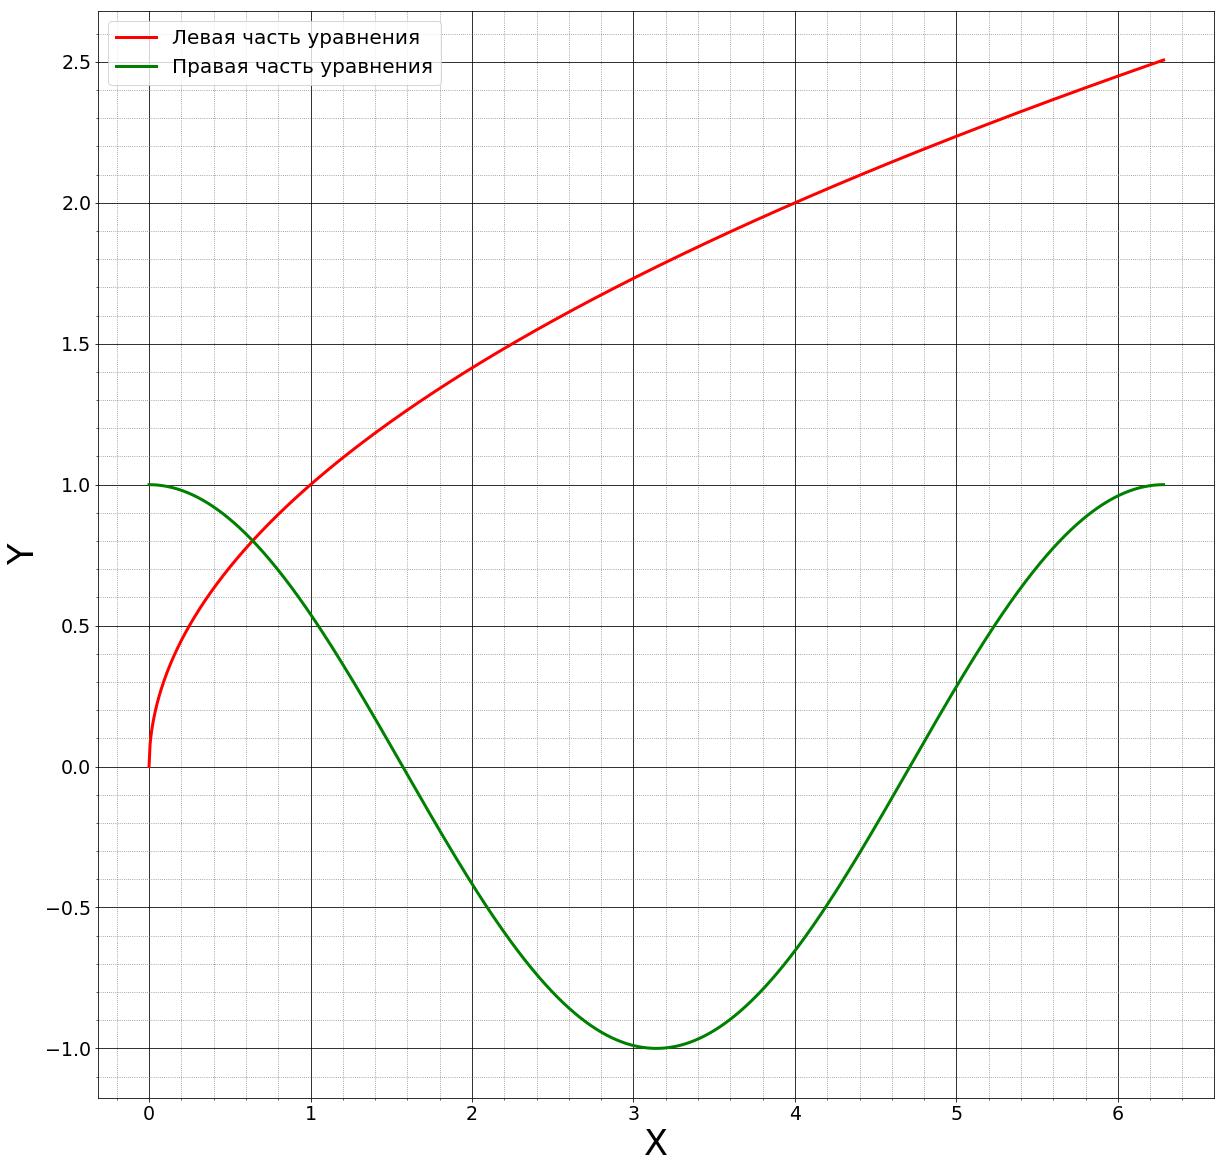

In [169]:
import matplotlib.pyplot as plt
import math
import numpy as np
import matplotlib.ticker as ticker

fig, ax = plt.subplots()

k = np.linspace(0, 2*np.pi, 1000)
y1 = np.sqrt(k)
y2 = np.cos(k)

ax.plot(k, y1, c='red', linewidth =3,  label='Левая часть уравнения')
ax.plot(k, y2,  c='green', linewidth =3, label='Правая часть уравнения')

ax.xaxis.set_minor_locator(ticker.MultipleLocator(1))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(1))
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.5))

ax.tick_params(axis='both', which ='major', labelsize =19)

ax.grid(which ='major', color ='k',linestyle ='-' )
ax.minorticks_on()
ax.grid(which ='minor', color ='grey', linestyle =':')
fig.set_figwidth(20)
fig.set_figheight(20)

plt.xlabel('X', fontsize= 35)
plt.ylabel('Y', fontsize= 35)

plt.legend(fontsize = 20)




Корень находится в интервале (0.6, 0.7)

In [170]:
def aa(x):
    return np.cos(x) - np.sqrt(x) 

In [171]:
"""Эта функция будет предсказывать значение параметра альфа, при котором будет оптимальная скорость сходимости"""

def optimum_alpha(f,interval_localizacii ):
    
    x_min = interval_localizacii[0]
    x_max = interval_localizacii[1]
    sp_x = np.linspace(x_min, x_max, 1000)
    sp_y = []
    
    for i in sp_x:
        sp_y.append(derivative(f, i, dx=1e-6)) # Этот цикл для нахождения минимума и максимума производной на интервале 
    sp_y = np.array(sp_y)
    sp_y = abs(sp_y)
    m = min(sp_y)
    M = max(sp_y)
    
    alpha = 2/(m+M)
    return alpha

optimum_alpha(aa, [1,2])

0.7487560703519102

Именно при таком значении параметра должно быть минимальное число итераций.

In [172]:
import cmath
from scipy.misc import derivative
from scipy.optimize import minimize
""" interval_localizacii - это список из двух элементов (нижней и верхней границ интервала локализации корня),
необходим для критерия остановки."""

def fixed_point_iteration(f, x0, interval_localizacii, eps=1e-5, maxiter=1000, alpha = 1 ):
    
    counter = 0
    x = x0
    z = [] 
    x_min = interval_localizacii[0]
    x_max = interval_localizacii[1]
    
    if derivative(f, x0, dx=1e-6) > 0 :
        while 0 == 0:
            x_old = x
            x = x_old - alpha*f(x_old) # Считаем приближение на следующем шаге.
            counter += 1
           # print(x_old, x)
            if abs(alpha*f(x)) < eps:
                break
            elif counter >= maxiter:
                break
                
    else:
        
        while 0 == 0:
            x_old = x
            x = x_old + alpha*f(x_old) # Считаем приближение на следующем шаге.
            counter += 1
           # print(x_old, x)
            if abs(alpha*f(x)) < eps:
                break
            elif counter >= maxiter:
                break
                
    return x, counter
### Проверим на работоспособность
fixed_point_iteration(aa, 0.9, eps=1e-5, maxiter=1000, alpha = 1, interval_localizacii=[0.6,0.7])

### Ура! Получилость очень даже неплохо.

(0.6417062930836003, 7)

In [176]:
# Эта часть потребуется для сравнения теории с экспериментом. Проверяем несколько значений альфа
l_y=[]
al = np.linspace(0.5, 1.6, 100)
for i in al:
    l_y.append(fixed_point_iteration(aa, 0.9, eps=1e-5, maxiter=1000, alpha = i, interval_localizacii=[0.6,0.7])[1])


Проверим, совпадает ли положение теоретического  минимума итераций с положением экспериментального.

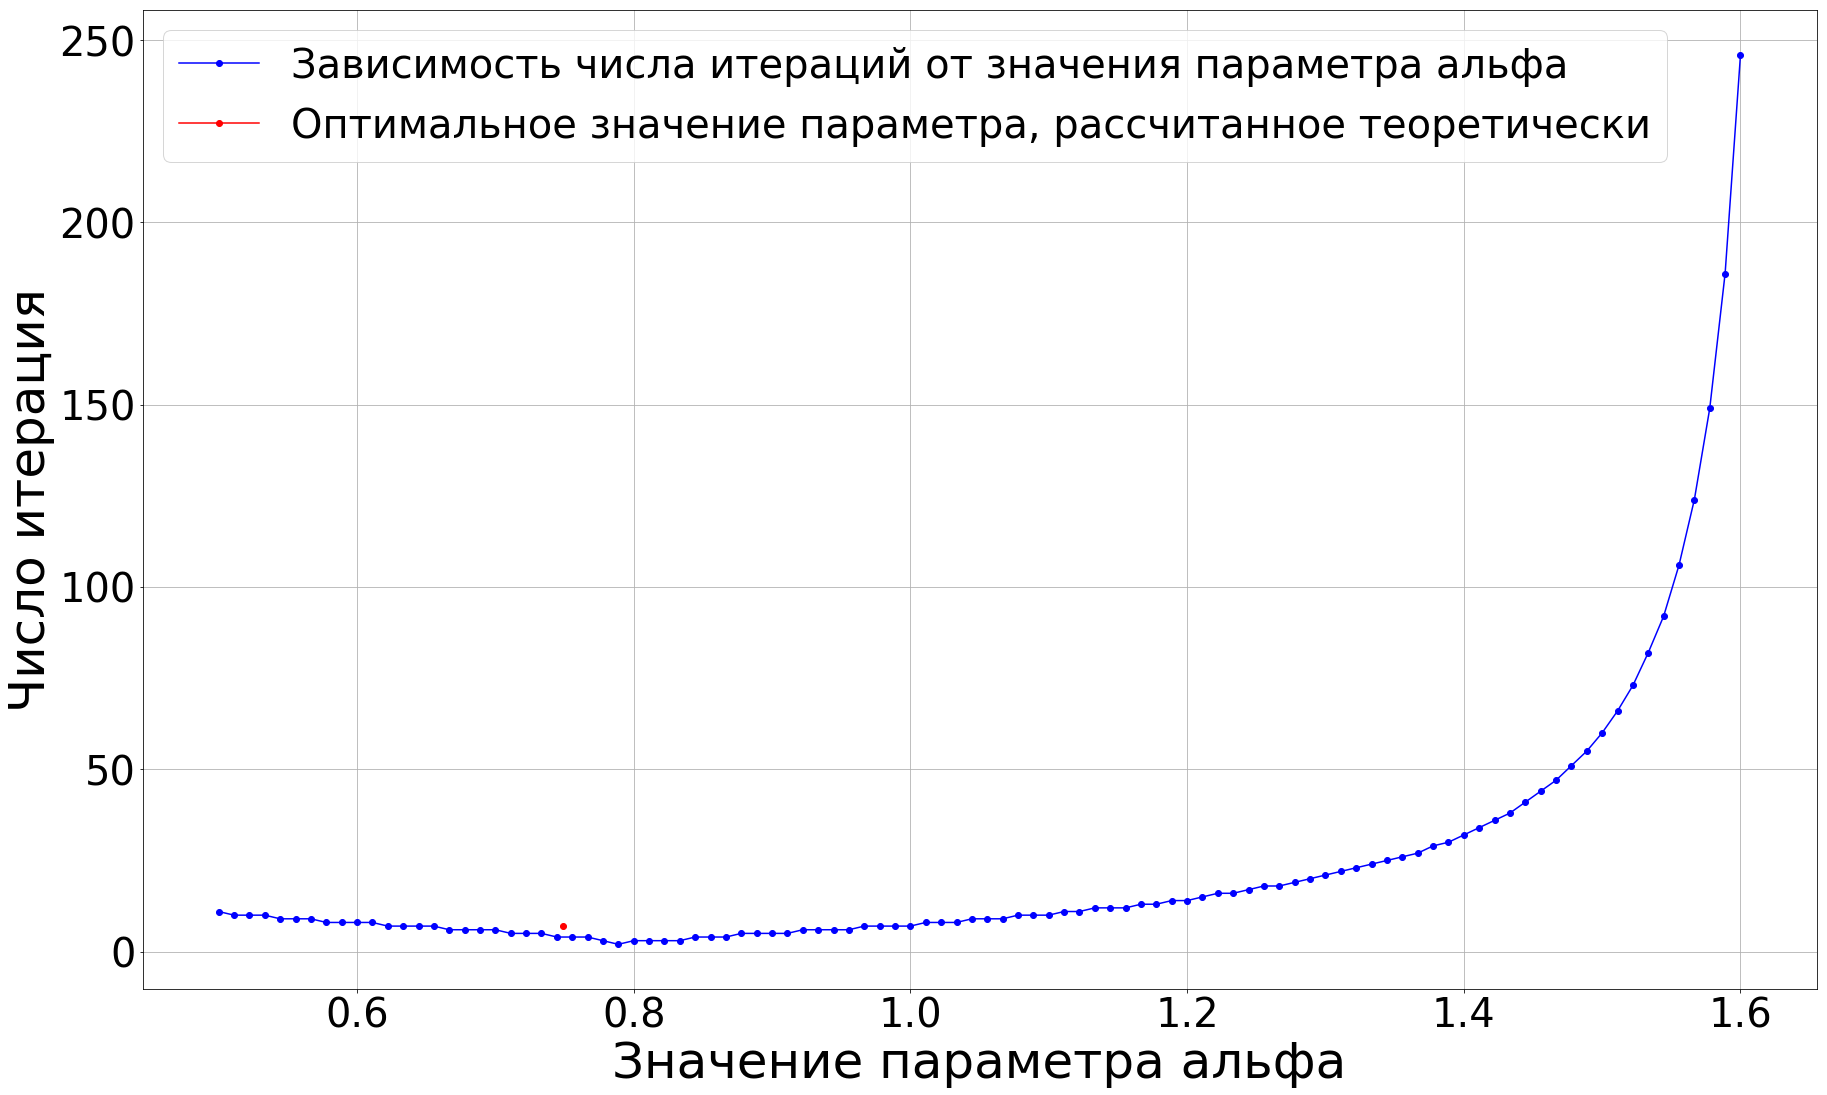

In [177]:
fig = plt.figure(figsize=(30, 18))

plt.plot(al, l_y,  c='blue', marker='o', label='Зависимость числа итераций от значения параметра альфа')
plt.xlabel('Значение параметра альфа', fontsize=50)
plt.ylabel('Число итерация', fontsize=50)
plt.tick_params(axis='both', which='major', labelsize=40)

plt.plot(optimum_alpha(aa, [1,2]), 7, c = 'r', marker ='o', label ='Оптимальное значение параметра, рассчитанное теоретически')
plt.grid()
plt.legend(fontsize = 40)


Действительно, теоретическое и экспериментальное значения лежат достаточно близко на оси Х.

# Part III. Newton's fractal.

(Not graded). 

Consider the equation

$$
x^3 = 1
$$

It has three solutions in the complex plane, $x_k = \exp(i\, 2\pi k/ 3)$, $k = 0, 1, 2$.

The Newton's iterations converge to one of these solutions, depending on the starting point in the complex plane (to converge to a complex-valued solution, the iteration needs a complex-valued starting point).

Plot the \emph{basins of attraction} of these roots on the complex plane of $x$ (i.e., on the plane $\mathrm{Re}x$ -- $\mathrm{Im}x$). To this end, make a series of calculations, varying the initial conditions on a grid of points. 
Color the grid in three colors, according to the root, to which iterations converged.